# LOGISTIC REGRESSION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset 
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. exploratory data analysis (EDA) & Data Preprocessing

In [7]:
### TRAIN
# Shape and data types
print("Shape of dataset:", train.shape)
print("\nColumn info:")
print(train.info())

# Summary statistics
print("\nSummary statistics:")
print(train.describe())

# Check missing values
print("\nMissing values:")
print(train.isnull().sum())

Shape of dataset: (891, 12)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.

In [8]:
### TEST
# Shape and data types
print("Shape of dataset:", test.shape)
print("\nColumn info:")
print(test.info())

# Summary statistics
print("\nSummary statistics:")
print(test.describe())

# Check missing values
print("\nMissing values:")
print(test.isnull().sum())

Shape of dataset: (418, 11)

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None

Summary statistics:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.

In [9]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train.drop(columns=['Cabin'], inplace=True)

test['Age'] = test['Age'].fillna(test['Age'].median())
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])
test.drop(columns=['Cabin'], inplace=True)

In [10]:
print("\nMissing values of train:")
print(train.isnull().sum())

print("\nMissing values of test:")
print(test.isnull().sum())


Missing values of train:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Missing values of test:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [11]:
train.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0

In [13]:
# Unique values in categorical columns (Train)
print("\n--- UNIQUE CATEGORICAL VALUES IN TRAIN ---")
cat_cols = train.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {train[col].unique()}")

# Unique values in categorical columns (Test)
print("\n--- UNIQUE CATEGORICAL VALUES IN TEST ---")
cat_cols_test = test.select_dtypes(include='object').columns
for col in cat_cols_test:
    print(f"{col}: {test[col].unique()}")


--- UNIQUE CATEGORICAL VALUES IN TRAIN ---
Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Al

## Visualizations on Train Data Only (for Target Analysis)

### Histograms of Numerical Features

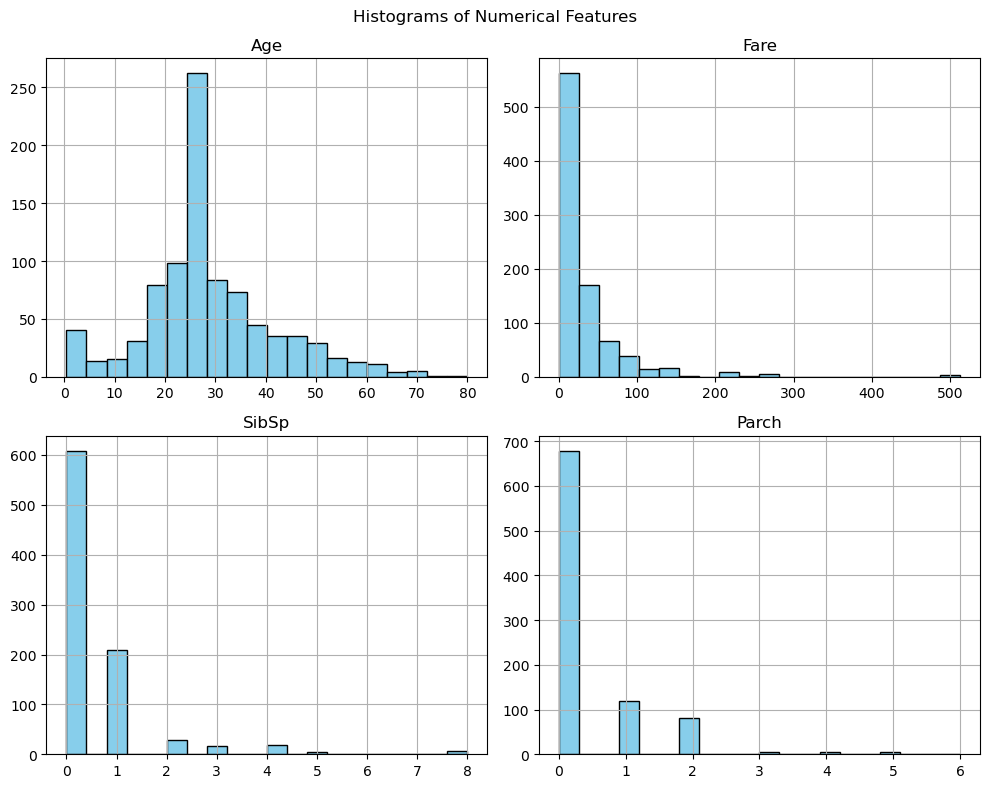

In [16]:
train[['Age', 'Fare', 'SibSp', 'Parch']].hist(figsize=(10, 8), bins=20, edgecolor='black', color='skyblue')
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

### Boxplots vs. Survived

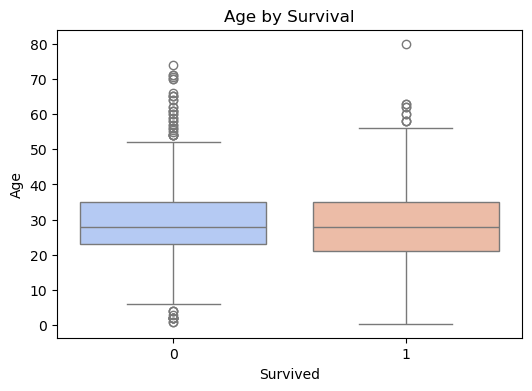

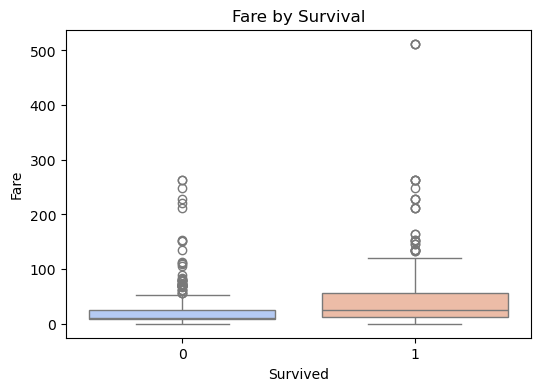

In [18]:
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Survived', y=col, data=train, palette='coolwarm')
    plt.title(f'{col} by Survival')
    plt.show()

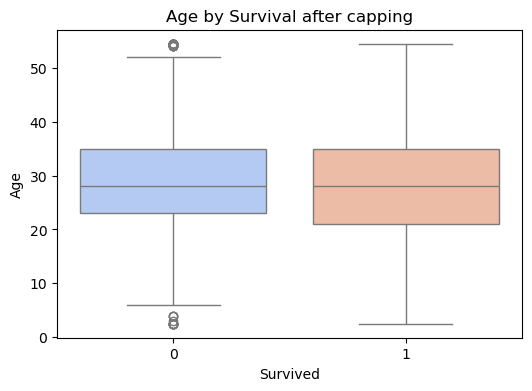

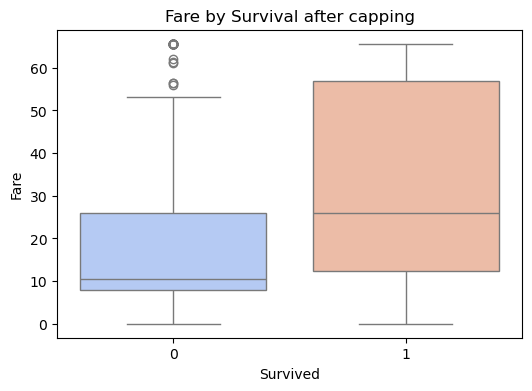

In [19]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Apply outlier capping to 'Age' and 'Fare' columns
for col in ['Age', 'Fare']:
    cap_outliers(train, col)

# Verify the capping by plotting box plots again
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Survived', y=col, data=train, palette='coolwarm')
    plt.title(f'{col} by Survival after capping')
    plt.show()

###  Countplots for Categorical Features

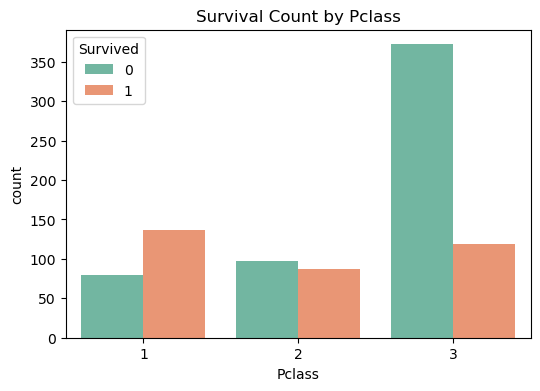

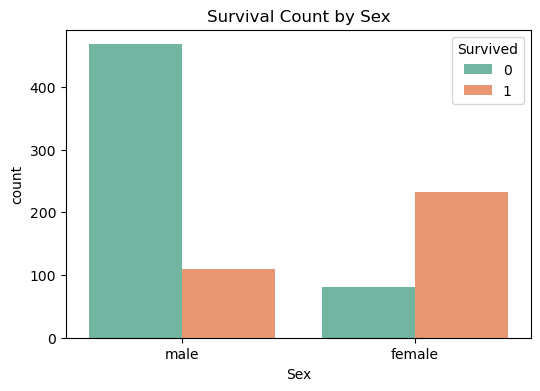

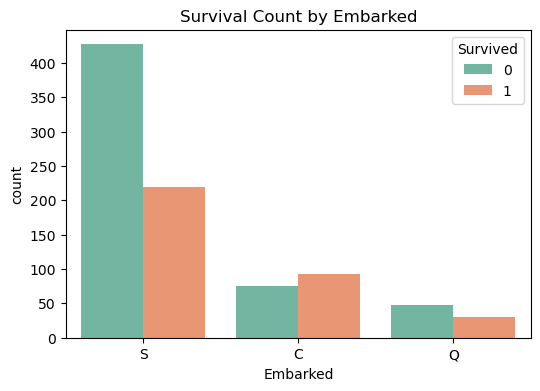

In [21]:
for col in ['Pclass', 'Sex', 'Embarked']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=train, hue='Survived', palette='Set2')
    plt.title(f'Survival Count by {col}')
    plt.show()

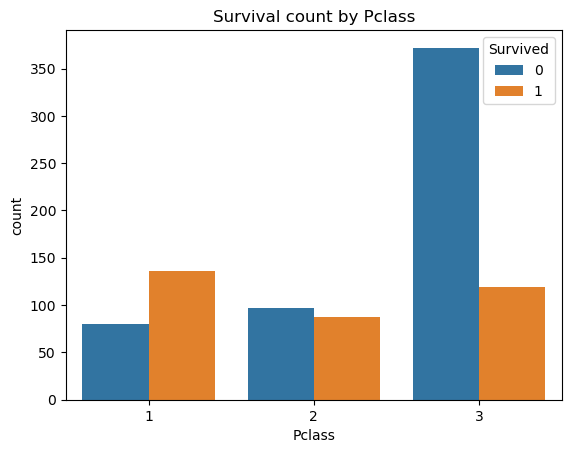

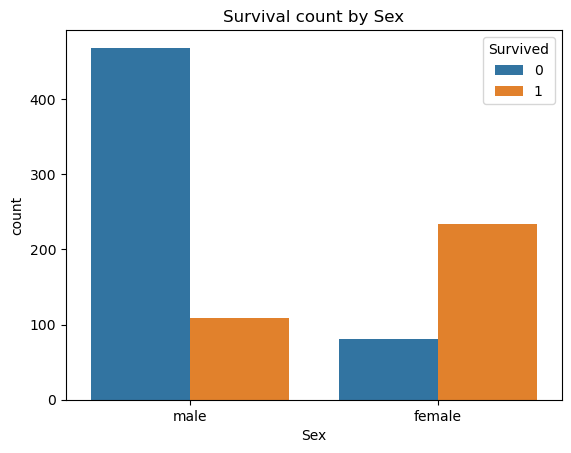

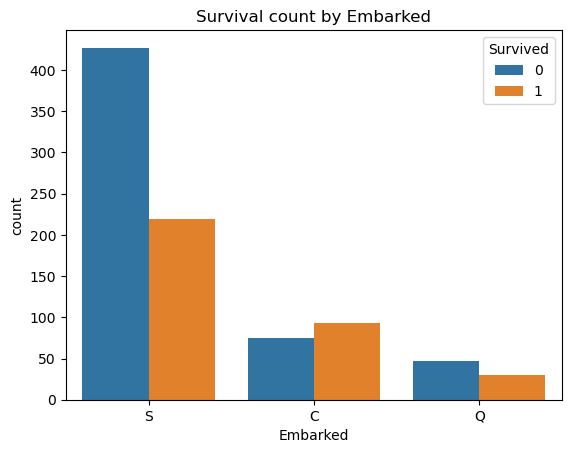

In [22]:
categorical_cols = ['Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    sns.countplot(x=col, data=train, hue='Survived')
    plt.title(f'Survival count by {col}')
    plt.show()

## Pairplot (Selected Features)

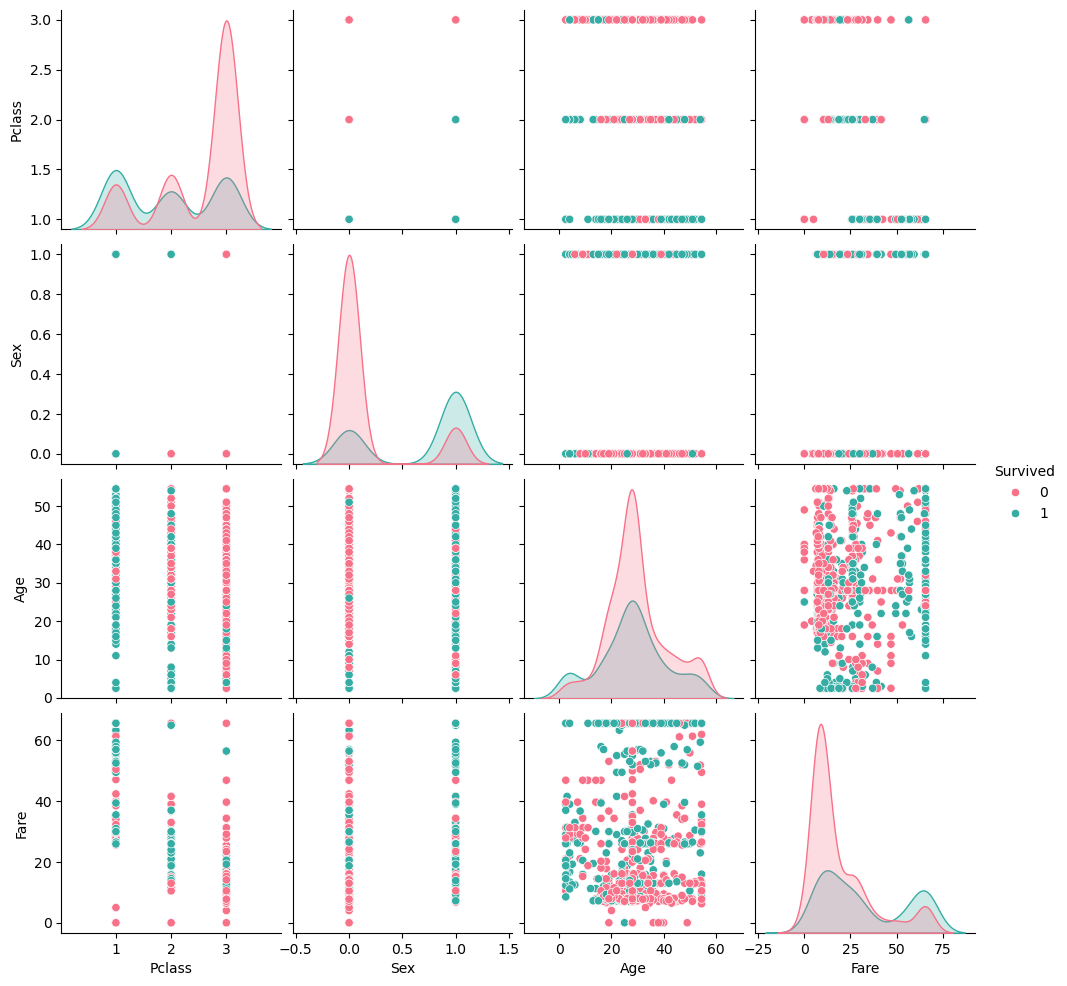

In [24]:
temp_train = train.copy()
temp_train['Sex'] = temp_train['Sex'].map({'male': 0, 'female': 1})
sns.pairplot(temp_train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived', palette='husl')
plt.show()

In [25]:
# Label Encode 'Sex'
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])

# One-hot encode 'Embarked' and 'Pclass'
train = pd.get_dummies(train, columns=['Embarked', 'Pclass'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked', 'Pclass'], drop_first=True)

# Align columns in train and test
train, test = train.align(test, join='left', axis=1, fill_value=0)

# 4. Model Evaluation:

In [27]:
# Drop columns not needed for training
x = train.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId'])
y = train['Survived']

# Split for validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Predictions
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]  # For ROC AUC

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Full report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1 Score: 0.7464788732394366
ROC AUC Score: 0.8754182754182755

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



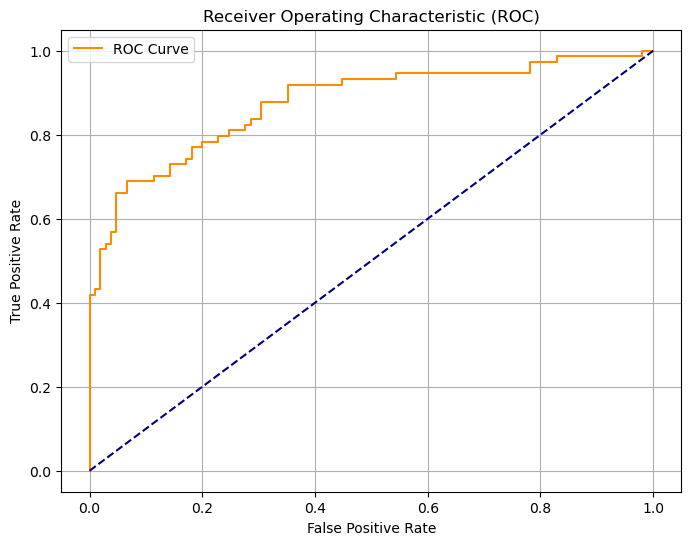

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()

#  5. Interpretation

In [32]:
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model.coef_[0]
})

coefficients['Exp(Coefficient)'] = np.exp(coefficients['Coefficient'])  # Odds ratio
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

#Positive Coefficient --> Increases the probability of survival.
#Negative Coefficient --> Decreases the probability of survival.
#Greater than 1: Positive impact
#Less than 1: Negative impact

      Feature  Coefficient  Exp(Coefficient)
4        Fare     0.023175          1.023446
1         Age    -0.032644          0.967883
7    Pclass_2    -0.033281          0.967267
5  Embarked_Q    -0.079774          0.923325
3       Parch    -0.190127          0.826854
2       SibSp    -0.404349          0.667411
6  Embarked_S    -0.424798          0.653902
8    Pclass_3    -1.118343          0.326821
0         Sex    -2.571801          0.076398


# 6. Deployment with Streamlit:

In [41]:
# Save only the model
with open('titanic_logreg_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [43]:
# All features are already numeric or one-hot encoded, no categorical transformer needed

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

# Numeric features (all are now numeric)
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']

# Apply standard scaling only to numerical continuous features
numeric_transformer = StandardScaler()

# Preprocessing step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'  # keep 'Sex' (already label encoded likely)
)

# Pipeline with logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the pipeline
pipeline.fit(x_train, y_train)


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
print(x_train.columns.tolist())

['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']


In [55]:
import streamlit as st
import numpy as np
import pickle

# Load model
with open('titanic_logreg_pipeline.pkl', 'rb') as f:
    model = pickle.load(f)

st.title("Titanic Survival Prediction App")
st.markdown("Enter passenger details to predict survival.")

# User Inputs
sex = st.selectbox("Sex", ['Male', 'Female'])
age = st.slider("Age", 0, 100, 30)
sibsp = st.number_input("Number of Siblings/Spouses Aboard (SibSp)", 0, 10, 0)
parch = st.number_input("Number of Parents/Children Aboard (Parch)", 0, 10, 0)
fare = st.number_input("Fare", 0.0, 600.0, 30.0)
embarked = st.selectbox("Embarked Port", ['S', 'Q'])  # Only S & Q since you dropped 'C'
pclass = st.selectbox("Passenger Class", [1, 2, 3])

# Preprocess inputs to match training format
sex = 1 if sex == 'Male' else 0
embarked_q = 1 if embarked == 'Q' else 0
embarked_s = 1 if embarked == 'S' else 0
pclass_2 = 1 if pclass == 2 else 0
pclass_3 = 1 if pclass == 3 else 0

# Input array in correct order
input_data = np.array([[sex, age, sibsp, parch, fare, embarked_q, embarked_s, pclass_2, pclass_3]])

# Prediction
if st.button("Predict"):
    prediction = model.predict(input_data)
    result = "Survived" if prediction[0] == 1 else "Did Not Survive"
    st.subheader(f"Prediction: {result}")